In [ ]:
# A brief of dataset

In [ ]:
'''
TSLA has been on the rice recently, with a crazy +100% spike in the last 30 days alone. With the history, maybe we can find out
why?
EOD data for Tesla's stock from 2010 to 2020.
'''

In [ ]:
# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# importing dataset

In [2]:
ts=pd.read_csv("C://Users//acer//Desktop//1sem//python//tesla-stock-data-from-2010-to-2020//TSLA.csv")

In [ ]:
# First few rows

In [3]:
ts.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800


In [ ]:
# Last few rows

In [4]:
ts.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
2413,2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000


In [ ]:
# listing all columns

In [7]:
ts.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# datatype of all columns

In [8]:
ts.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# looking at null values

In [9]:
ts.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# stats value 

In [10]:
ts.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [ ]:
# feature engineering

In [ ]:
# renaming all columns to lower case

In [12]:
ts.columns=map(str.lower,ts.columns)

In [13]:
ts.head()

,date,open,high,low,close,adj close,volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
# Date : object

In [ ]:
# converting datattype from object to date time

In [14]:
ts["date"]=pd.to_datetime(ts.date)

In [15]:
ts.date.dtype

dtype('<M8[ns]')

In [18]:
ts["day"]=ts["date"].dt.day

In [19]:
ts["month"]=ts["date"].dt.month

In [20]:
ts["year"]=ts["date"].dt.year

In [21]:
ts.head(2)

,date,open,high,low,close,adj close,volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,30,6,2010


In [ ]:
# Lets drop date col

In [23]:
ts.drop("date",axis=1,inplace=True)

In [26]:
ts.dtypes

open         float64
high         float64
low          float64
close        float64
adj close    float64
volume         int64
day            int64
month          int64
year           int64
dtype: object

In [ ]:
# Data visualization 

In [ ]:
# hist plot

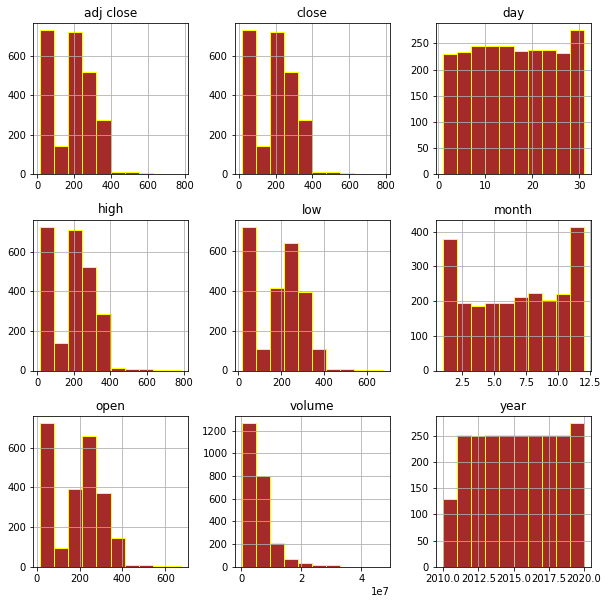

In [33]:
ts.hist(figsize=(10,10),color="brown",edgecolor="yellow")
plt.show()

In [ ]:
# dividing data into dependent and independent dataset

In [34]:
y=ts["volume"]
x=ts.drop("volume",axis=1)

In [ ]:
# vif

In [38]:
vif=pd.DataFrame()
vif["vif factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"]=x.columns

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [39]:
vif

,vif factor,features
0,1.016350e+04,open
1,1.330622e+04,high
2,1.144012e+04,low
3,inf,close
4,inf,adj close
5,4.249717e+00,day
6,4.739440e+00,month
7,1.050968e+01,year


In [ ]:
# feature selection using extra classifier

In [41]:
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.14453468 0.14704341 0.14860727 0.15029679 0.14803043 0.1367084
 0.08181571 0.04296331]


<function matplotlib.pyplot.show(*args, **kw)>

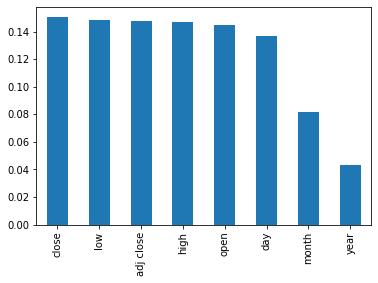

In [42]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind="bar")
plt.show

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.14812674 0.14695206 0.14832869 0.1462544  0.14572542 0.14003177
 0.08337842 0.0412025 ]


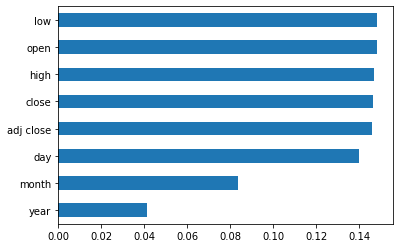

In [43]:
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nsmallest(10).plot(kind="barh")

In [ ]:
# feature importamce using chisq

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score'))  #print 10 best features

In [44]:
bestfeatures=SelectKBest(score_func=chi2,k=8)
fit=bestfeatures.fit(x,y)
dfscore=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [ ]:
# concating both df

In [48]:
featscore=pd.concat([dfscore,dfcolumns],axis=1)

In [ ]:
# renaming col name

In [55]:
featscore.columns=["score","specs"]

In [56]:
featscore

,score,specs
0,182036.309714,open
1,185422.312333,high
2,179534.067776,low
3,183134.522190,close
4,183134.522190,adj close
5,11641.604289,day
6,4249.482342,month
7,9.278820,year


In [58]:
print(featscore.nlargest(10,'score'))

           score      specs
1  185422.312333       high
3  183134.522190      close
4  183134.522190  adj close
0  182036.309714       open
2  179534.067776        low
5   11641.604289        day
6    4249.482342      month
7       9.278820       year


In [ ]:
# lets split dataset into training and test dataset

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# printing the shape of splitted dataset

In [64]:
print("shape of x_train is:",x_train.shape)
print("shape of y_train is:",y_train.shape)
print("shape of x_test is:",x_test.shape)
print("shape of y_test is:",y_test.shape)

shape of x_train is: (1691, 8)
shape of y_train is: (1691,)
shape of x_test is: (725, 8)
shape of y_test is: (725,)


In [ ]:
# Lets apply ml algo 

In [74]:
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)
prediction=np.round(prediction,0)

In [75]:
output=pd.DataFrame({"Act":y_test,"Pred":prediction})
print(output)

           Act       Pred
410    1157900  2422883.0
199    1357400  2039985.0
1670   4947900  4695940.0
1934   4285700  7392421.0
1036   8101300  6029153.0
...        ...        ...
270     673300  1891651.0
1041   5849200  5399372.0
1047   3818000  2671682.0
1292   7176700  4523304.0
2405  13629100  7754436.0

[725 rows x 2 columns]


In [71]:
# Evaluating the result

In [76]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))

mean abs error: 2078413.0331034483
mean sq error: 9442361370893.709
root mean sq error: 3072842.5555003155
variance score: 0.59


In [ ]:
# applying polynomial regression

In [79]:
pf=PolynomialFeatures(degree=3)
x_poly=pf.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
y_poly_pred = model.predict(x_test)
print("mean abs error:",mean_absolute_error(y_test,y_poly_pred))
print("mean sq error:",mean_squared_error(y_test,y_poly_pred))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,y_poly_pred)))
print("Residual sum of squares: %.2f"
  % ((model.predict(x_test) - y_test) ** 2).sum())

mean abs error: 1997821.1743911637
mean sq error: 15361263975263.477
root mean sq error: 3919344.8400547095
Residual sum of squares: 11136916382066020.00
